In [11]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize, ModelSpec as MS)
from statsmodels.stats.anova import anova_lm
 
from pygam import (s as s_gam, l as l_gam, f as f_gam, LinearGAM, LogisticGAM)
from ISLP.transforms import (BSpline, NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam, degrees_of_freedom, plot as plot_gam, anova as anova_gam)

Wage = pd.read_csv('Wage.csv')
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [7]:
y = Wage['wage']
age = Wage['age']
poly_age = MS([poly('age', degree=4)]).fit(Wage)
M = sm.OLS(y, poly_age.transform(Wage)).fit()
summarize(M)

,coef,std err,t,P>|t|
intercept,111.7036,0.729,153.283,0.000
"poly(age, degree=4)[0]",447.0679,39.915,11.201,0.000
"poly(age, degree=4)[1]",-478.3158,39.915,-11.983,0.000
"poly(age, degree=4)[2]",125.5217,39.915,3.145,0.002
"poly(age, degree=4)[3]",-77.9112,39.915,-1.952,0.051


In [8]:
age_grid = np.linspace(age.min(), age.max(), 100)
age_df = pd.DataFrame({'age': age_grid})

In [10]:
age_range = np.linspace(age.min(), age.max(), 100) 
# Predict wage using the model
wage_pred = M.predict(poly_age.transform(age_range))

# Plotting the results
plt.scatter(age, y, label='Data Points', alpha=0.6)
plt.plot(age_range, wage_pred, color='red', label='Polynomial Fit', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Polynomial Regression Fit (Degree 4)')
plt.legend()
plt.show()

NameError: name 'PolynomialFeatures' is not defined

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.77e-57
Time:                        17:19:00   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.0

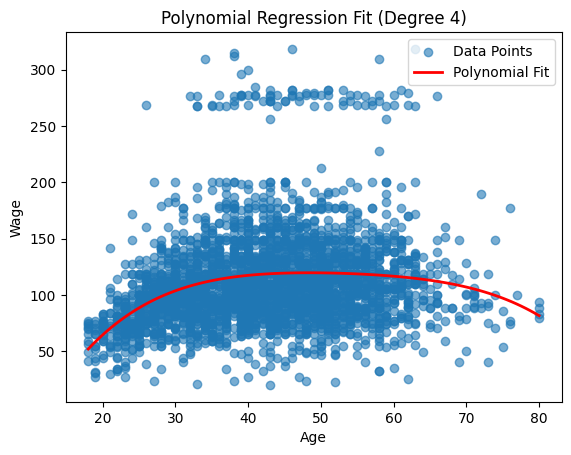

In [12]:

from sklearn.preprocessing import PolynomialFeatures

# Assuming Wage is a pandas DataFrame
y = Wage['wage']
age = Wage['age']

# Fit a 4th-degree polynomial for the 'age' feature
poly_age = PolynomialFeatures(degree=4)
age_poly = poly_age.fit_transform(age.values.reshape(-1, 1))

# Fit the OLS model
M = sm.OLS(y, age_poly).fit()

# Summarize the model
print(M.summary())

# Generate age values for prediction
age_range = np.linspace(age.min(), age.max(), 100).reshape(-1, 1)  # Reshape for consistency
age_range_poly = poly_age.transform(age_range)  # Transform the age range

# Predict wage using the model
wage_pred = M.predict(age_range_poly)

# Plotting the results
plt.scatter(age, y, label='Data Points', alpha=0.6)
plt.plot(age_range, wage_pred, color='red', label='Polynomial Fit', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Polynomial Regression Fit (Degree 4)')
plt.legend()
plt.show()
